# Chinook Database Analysis
This notebook performs an analysis of the Chinook database, which contains information about a digital music store (customers, artists, albums, songs, genres, and sales).

In [1]:
# 📊 Day 7: SQL for Data Science (Joins, Aggregations)
# Author: David Caleb Chaparro Orozco
# Topic: Exploring SQL Joins and Aggregations using Microsoft Chinook Dataset

# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
# Read the database
conn = sqlite3.connect("data/Chinook_Sqlite.sqlite")

# Helper function to execute queries and display results
def run_query(query):
    return pd.read_sql_query(query, conn)

In [3]:
tables_query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
run_query(tables_query)

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


# Level 1 – Basic Joins

## List of clients and the country where they live

In [4]:
querry_list_client_country_live = """
SELECT FirstName, LastName, Country
FROM Customer
LIMIT 10;
"""
client_country_live = run_query(querry_list_client_country_live)
client_country_live

,FirstName,LastName,Country
0,Luís,Gonçalves,Brazil
1,Leonie,Köhler,Germany
2,François,Tremblay,Canada
3,Bjørn,Hansen,Norway
4,František,Wichterlová,Czech Republic
5,Helena,Holý,Czech Republic
6,Astrid,Gruber,Austria
7,Daan,Peeters,Belgium
8,Kara,Nielsen,Denmark
9,Eduardo,Martins,Brazil


## Name of each album and the artist who recorded it

In [5]:
query_album_artist = """
SELECT al.AlbumId, al.Title AS AlbumTitle, ar.Name AS ArtistName
FROM Album AS al
JOIN Artist AS ar 
    ON al.ArtistId = ar.ArtistId;
"""
album_artist = run_query(query_album_artist)
album_artist.head()

,AlbumId,AlbumTitle,ArtistName
0,1,For Those About To Rock We Salute You,AC/DC
1,2,Balls to the Wall,Accept
2,3,Restless and Wild,Accept
3,4,Let There Be Rock,AC/DC
4,5,Big Ones,Aerosmith


# Level 2 – Joins + Filters

## List of songs by a specific artist

In [6]:
query_songs_by_artist = """
SELECT t.TrackId, t.Name AS TrackName, al.Title AS AlbumTitle, ar.Name AS ArtistName
FROM Track AS t
JOIN Album AS al ON t.AlbumId = al.AlbumId
JOIN Artist AS ar ON al.ArtistId = ar.ArtistId
WHERE ar.Name = 'AC/DC';
"""
songs_by_artist = run_query(query_songs_by_artist)
songs_by_artist.head()

,TrackId,TrackName,AlbumTitle,ArtistName
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,6,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
2,7,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
3,8,Inject The Venom,For Those About To Rock We Salute You,AC/DC
4,9,Snowballed,For Those About To Rock We Salute You,AC/DC


## Customers from Brazil and their invoices

In [7]:
query_brazil_customers_invoices = """
SELECT c.CustomerId, c.FirstName, c.LastName, 
    i.InvoiceId, i.InvoiceDate, i.Total
FROM Customer as c 
JOIN Invoice as i 
ON c.CustomerId = i.CustomerId
WHERE Country = 'Brazil';
"""
brazil_customers_invoices = run_query(query_brazil_customers_invoices)
brazil_customers_invoices.head()

,CustomerId,FirstName,LastName,InvoiceId,InvoiceDate,Total
0,1,Luís,Gonçalves,98,2010-03-11 00:00:00,3.98
1,1,Luís,Gonçalves,121,2010-06-13 00:00:00,3.96
2,1,Luís,Gonçalves,143,2010-09-15 00:00:00,5.94
3,1,Luís,Gonçalves,195,2011-05-06 00:00:00,0.99
4,1,Luís,Gonçalves,316,2012-10-27 00:00:00,1.98


# Level 3 – Aggregations

## Number of songs per genre

In [8]:
query_songs_per_genre = """
SELECT g.Name AS GenreName,
    COUNT(t.TrackId) AS TrackCount
FROM Track AS t
JOIN Genre AS g 
    ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY g.Name ASC;
"""
songs_per_genre = run_query(query_songs_per_genre)
songs_per_genre

,GenreName,TrackCount
0,Alternative,40
1,Alternative & Punk,332
2,Blues,81
3,Bossa Nova,15
4,Classical,74
5,Comedy,17
6,Drama,64
7,Easy Listening,24
8,Electronica/Dance,30
9,Heavy Metal,28


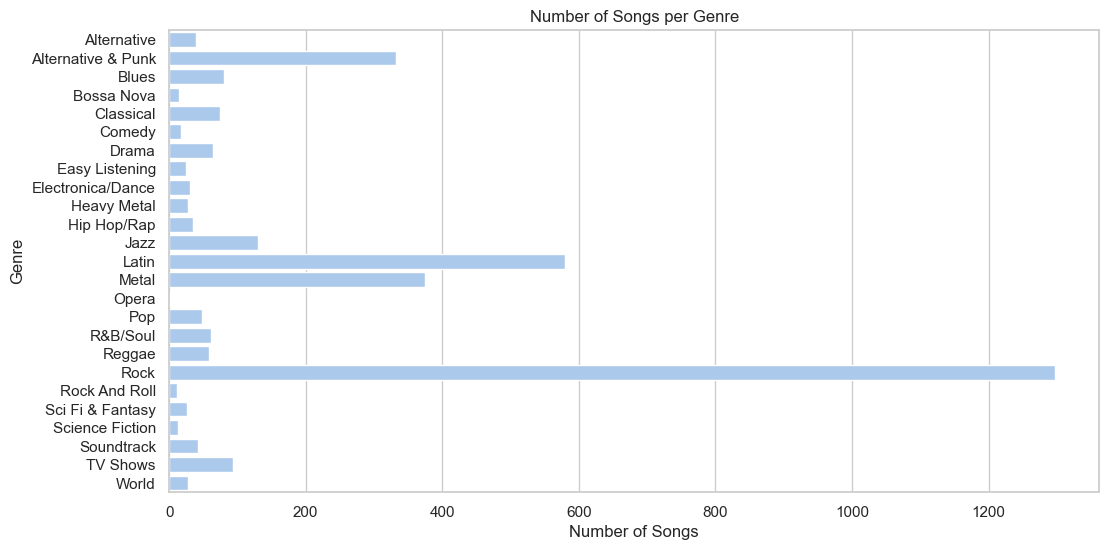

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TrackCount', y='GenreName', data=songs_per_genre)
plt.title('Number of Songs per Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

## Total sales by country

In [10]:
query_sales_by_country = """
SELECT c.Country,
    SUM(i.Total) AS TotalSales
FROM Customer AS c
JOIN Invoice AS i 
    ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
sales_by_country = run_query(query_sales_by_country)
sales_by_country

,Country,TotalSales
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


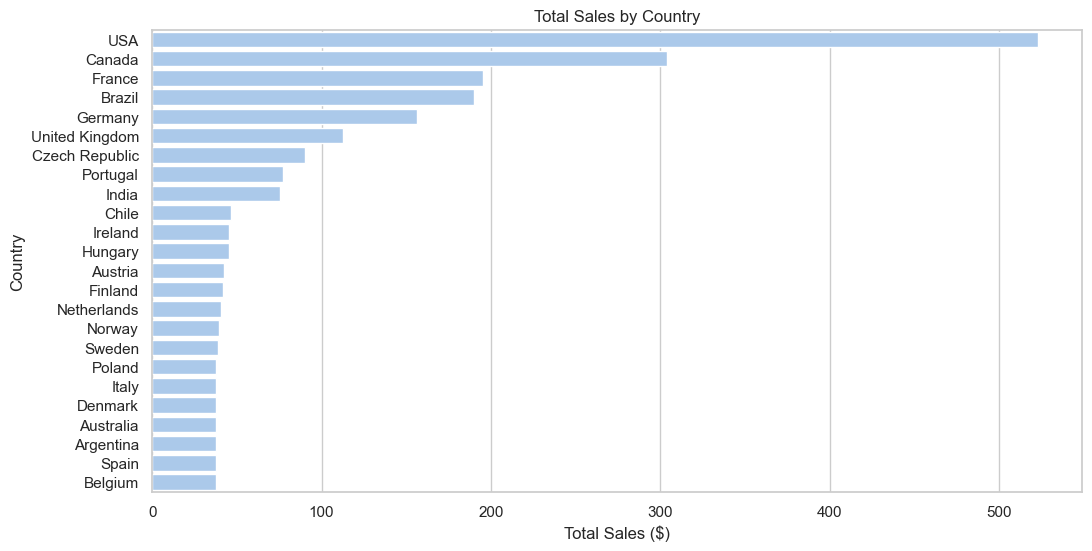

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalSales', y='Country', data=sales_by_country)
plt.title('Total Sales by Country')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.show()

# Level 4 – Joins + Advanced Aggregations

## Artist with the most songs in the database

In [12]:
query_artist_most_songs = """
SELECT ar.Name AS ArtistName,
    COUNT(t.TrackId) AS TrackCount
FROM Artist AS ar
JOIN Album AS al 
    ON ar.ArtistId = al.ArtistId
JOIN Track AS t 
    ON al.AlbumId = t.AlbumId
GROUP BY ar.ArtistId
ORDER BY TrackCount DESC;
"""
artist_most_songs = run_query(query_artist_most_songs)
artist_most_songs.head()

,ArtistName,TrackCount
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92


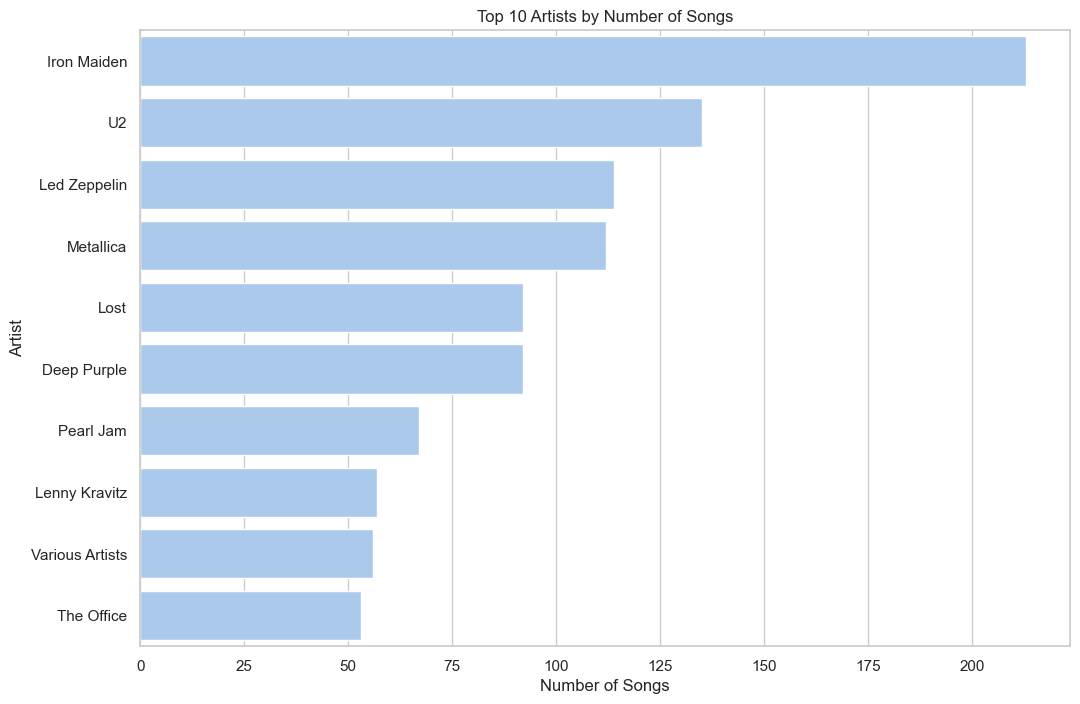

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TrackCount', y='ArtistName', 
            data=artist_most_songs.head(10))
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

## Top 5 customers who have spent the most

In [14]:
query_top_customers = """
SELECT c.FirstName || ' ' || c.LastName AS CustomerName,
    SUM(i.Total) AS TotalSpent
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 10;
"""
top_customers = run_query(query_top_customers)
top_customers

,CustomerName,TotalSpent
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62
5,Julia Barnett,43.62
6,Frank Ralston,43.62
7,Fynn Zimmermann,43.62
8,Astrid Gruber,42.62
9,Victor Stevens,42.62


C:\Users\Usuario\AppData\Local\Temp\ipykernel_37748\2935791609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="TotalSpent", y="CustomerName", palette="Blues_r")


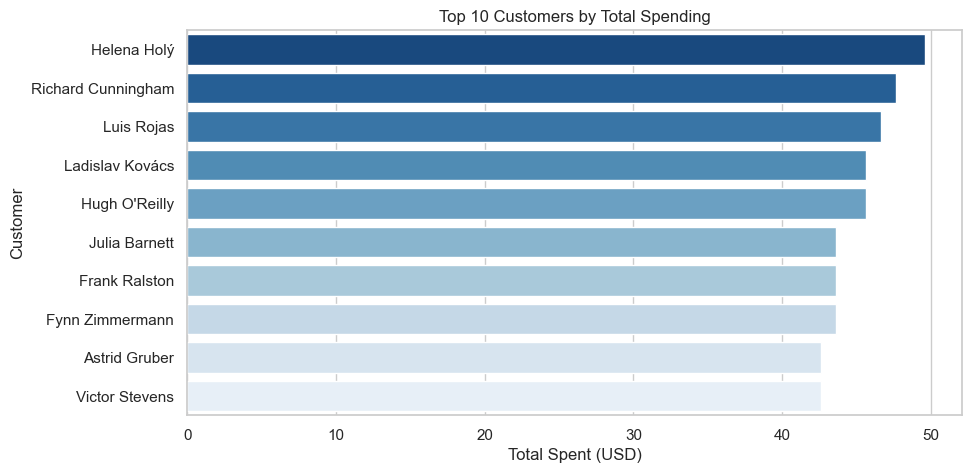

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x="TotalSpent", y="CustomerName", palette="Blues_r")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spent (USD)")
plt.ylabel("Customer")
plt.show()

## Average length (in seconds) of songs by artist

In [16]:
query_avg_song_length = """
SELECT ar.Name AS ArtistName,
    ROUND(AVG(t.Milliseconds) / 1000, 2) AS AvgDurationSeconds
FROM Artist AS ar
JOIN Album AS al 
    ON ar.ArtistId = al.ArtistId
JOIN Track AS t 
    ON al.AlbumId = t.AlbumId
GROUP BY ar.ArtistId
ORDER BY AvgDurationSeconds DESC;
"""
avg_song_length = run_query(query_avg_song_length)
avg_song_length.head()

,ArtistName,AvgDurationSeconds
0,Battlestar Galactica (Classic),2925.57
1,Battlestar Galactica,2770.46
2,Heroes,2599.14
3,Lost,2589.98
4,Aquaman,2484.57


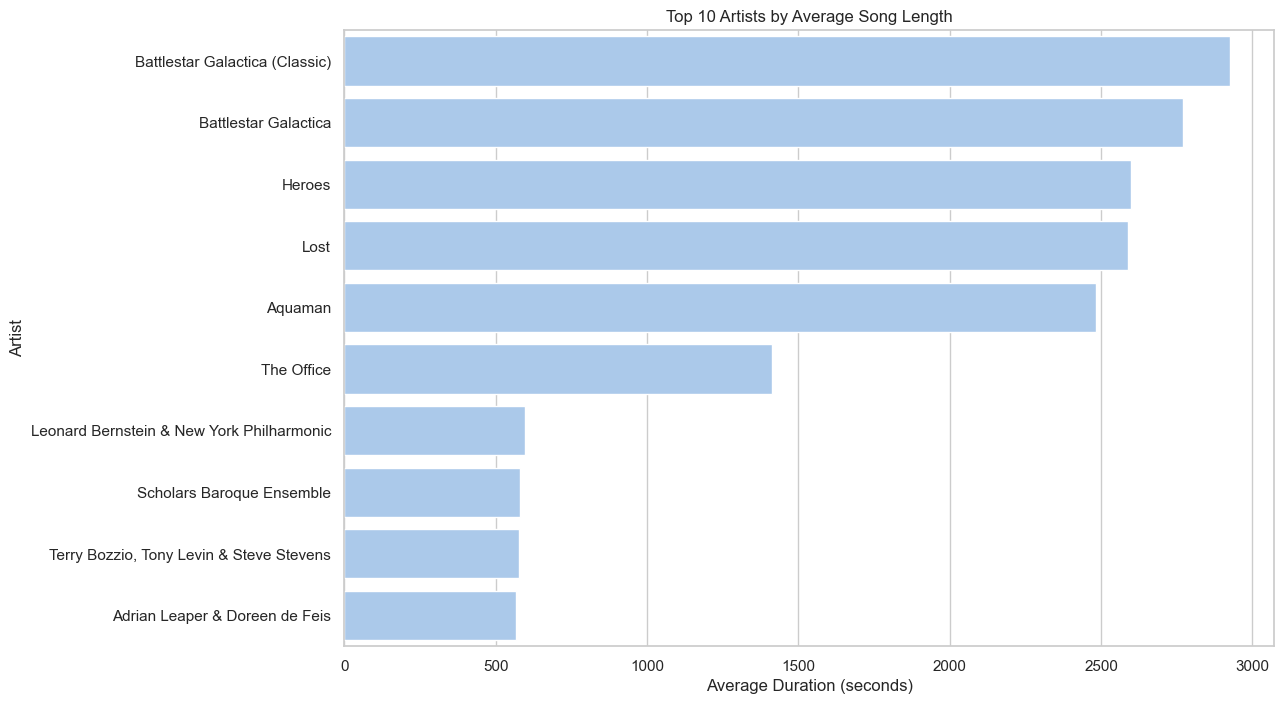

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='AvgDurationSeconds', y='ArtistName', 
            data=avg_song_length.head(10))
plt.title('Top 10 Artists by Average Song Length')
plt.xlabel('Average Duration (seconds)')
plt.ylabel('Artist')
plt.show()

# Additional Analysis: Invoice Trends Over Time

In [18]:
query_invoice_trends = """
SELECT strftime('%Y-%m', InvoiceDate) AS YearMonth,
    COUNT(InvoiceId) AS InvoiceCount,
    SUM(Total) AS TotalSales
FROM Invoice
GROUP BY YearMonth
ORDER BY YearMonth;
"""
invoice_trends = run_query(query_invoice_trends)
invoice_trends.head()

,YearMonth,InvoiceCount,TotalSales
0,2009-01,6,35.64
1,2009-02,7,37.62
2,2009-03,7,37.62
3,2009-04,7,37.62
4,2009-05,7,37.62


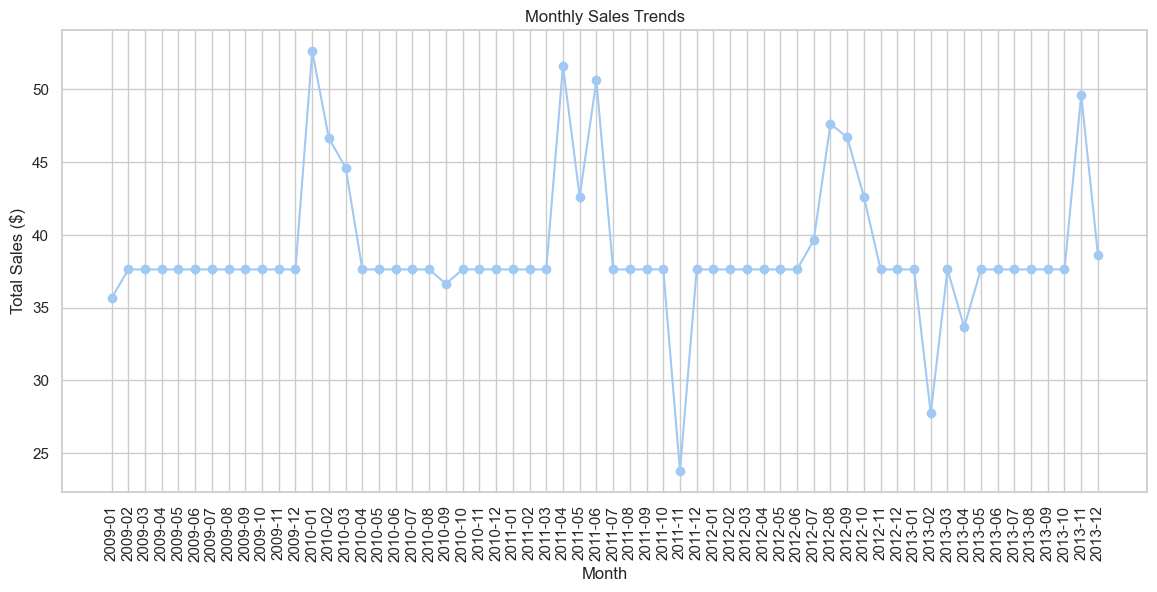

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(invoice_trends['YearMonth'], invoice_trends['TotalSales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [20]:
# Close the database connection
conn.close()

---
# Testing analysisSQL_utils.py
---

In [21]:
# Import utility module
from analysisSQL_utils import *

# Initial configuration
configure_visuals(figsize=(14, 8), palette="muted", output_dir="outputs")
print("Visual configuration completed.\n")

# Connect to database
db_path = "data/Chinook_Sqlite.sqlite"
conn = connect_db(db_path)
print(f"Database connection established: {db_path}\n")

Visual configuration completed.

Database connection established: data/Chinook_Sqlite.sqlite



In [22]:
# Query 1: List of customers and their countries (first 10)
query_customers = """
SELECT FirstName, LastName, Country
FROM Customer
LIMIT 10;
"""
customers = run_query(conn, query_customers)
save_to_csv(customers, "customers_countries.csv")
print("Customers and countries (first 10):")
print(customers.to_string(index=False), "\n")

Data saved to outputs\customers_countries.csv
Customers and countries (first 10):
FirstName    LastName        Country
     Luís   Gonçalves         Brazil
   Leonie      Köhler        Germany
 François    Tremblay         Canada
    Bjørn      Hansen         Norway
František Wichterlová Czech Republic
   Helena        Holý Czech Republic
   Astrid      Gruber        Austria
     Daan     Peeters        Belgium
     Kara     Nielsen        Denmark
  Eduardo     Martins         Brazil 



In [23]:
# Query 2: Albums and their artists
query_albums = """
SELECT al.AlbumId, al.Title AS AlbumTitle, ar.Name AS ArtistName
FROM Album AS al
JOIN Artist AS ar 
    ON al.ArtistId = ar.ArtistId;
"""
albums = run_query(conn, query_albums)
save_to_csv(albums, "albums_artists.csv")
print("Albums and artists (first 5):")
print(albums.head().to_string(index=False), "\n")

Data saved to outputs\albums_artists.csv
Albums and artists (first 5):
 AlbumId                            AlbumTitle ArtistName
       1 For Those About To Rock We Salute You      AC/DC
       2                     Balls to the Wall     Accept
       3                     Restless and Wild     Accept
       4                     Let There Be Rock      AC/DC
       5                              Big Ones  Aerosmith 



In [24]:
# Query 3: Songs by AC/DC
query_acdc = """
SELECT t.TrackId, t.Name AS TrackName, al.Title AS AlbumTitle, ar.Name AS ArtistName
FROM Track AS t
JOIN Album AS al ON t.AlbumId = al.AlbumId
JOIN Artist AS ar ON al.ArtistId = ar.ArtistId
WHERE ar.Name = 'AC/DC';
"""
acdc = run_query(conn, query_acdc)
save_to_csv(acdc, "acdc_songs.csv")
print("Songs by AC/DC:")
print(acdc.to_string(index=False), "\n")

Data saved to outputs\acdc_songs.csv
Songs by AC/DC:
 TrackId                               TrackName                            AlbumTitle ArtistName
       1 For Those About To Rock (We Salute You) For Those About To Rock We Salute You      AC/DC
       6                   Put The Finger On You For Those About To Rock We Salute You      AC/DC
       7                         Let's Get It Up For Those About To Rock We Salute You      AC/DC
       8                        Inject The Venom For Those About To Rock We Salute You      AC/DC
       9                              Snowballed For Those About To Rock We Salute You      AC/DC
      10                              Evil Walks For Those About To Rock We Salute You      AC/DC
      11                                  C.O.D. For Those About To Rock We Salute You      AC/DC
      12                      Breaking The Rules For Those About To Rock We Salute You      AC/DC
      13                Night Of The Long Knives For Those About 

In [25]:
# Query 4: Customers from Brazil and their invoices
query_brazil = """
SELECT c.CustomerId, c.FirstName, c.LastName, 
    i.InvoiceId, i.InvoiceDate, i.Total
FROM Customer as c 
JOIN Invoice as i 
ON c.CustomerId = i.CustomerId
WHERE Country = 'Brazil';
"""
brazil = run_query(conn, query_brazil)
save_to_csv(brazil, "brazil_customers.csv")
print("Customers from Brazil and their invoices:")
print(brazil.to_string(index=False), "\n")

Data saved to outputs\brazil_customers.csv
Customers from Brazil and their invoices:
 CustomerId FirstName  LastName  InvoiceId         InvoiceDate  Total
          1      Luís Gonçalves         98 2010-03-11 00:00:00   3.98
          1      Luís Gonçalves        121 2010-06-13 00:00:00   3.96
          1      Luís Gonçalves        143 2010-09-15 00:00:00   5.94
          1      Luís Gonçalves        195 2011-05-06 00:00:00   0.99
          1      Luís Gonçalves        316 2012-10-27 00:00:00   1.98
          1      Luís Gonçalves        327 2012-12-07 00:00:00  13.86
          1      Luís Gonçalves        382 2013-08-07 00:00:00   8.91
         10   Eduardo   Martins         25 2009-04-09 00:00:00   8.91
         10   Eduardo   Martins        154 2010-11-14 00:00:00   1.98
         10   Eduardo   Martins        177 2011-02-16 00:00:00   3.96
         10   Eduardo   Martins        199 2011-05-21 00:00:00   5.94
         10   Eduardo   Martins        251 2012-01-09 00:00:00   0.99
     

In [26]:
# Query 5: Number of songs per genre
query_genres = """
SELECT g.Name AS GenreName,
    COUNT(t.TrackId) AS TrackCount
FROM Track AS t
JOIN Genre AS g 
    ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY g.Name ASC;
"""
genres = run_query(conn, query_genres)
save_to_csv(genres, "songs_per_genre.csv")
print(genres.to_string(index=False), "\n")

Data saved to outputs\songs_per_genre.csv
         GenreName  TrackCount
       Alternative          40
Alternative & Punk         332
             Blues          81
        Bossa Nova          15
         Classical          74
            Comedy          17
             Drama          64
    Easy Listening          24
 Electronica/Dance          30
       Heavy Metal          28
       Hip Hop/Rap          35
              Jazz         130
             Latin         579
             Metal         374
             Opera           1
               Pop          48
          R&B/Soul          61
            Reggae          58
              Rock        1297
     Rock And Roll          12
  Sci Fi & Fantasy          26
   Science Fiction          13
        Soundtrack          43
          TV Shows          93
             World          28 



✅ Plot saved to: outputs/songs_per_genre.png


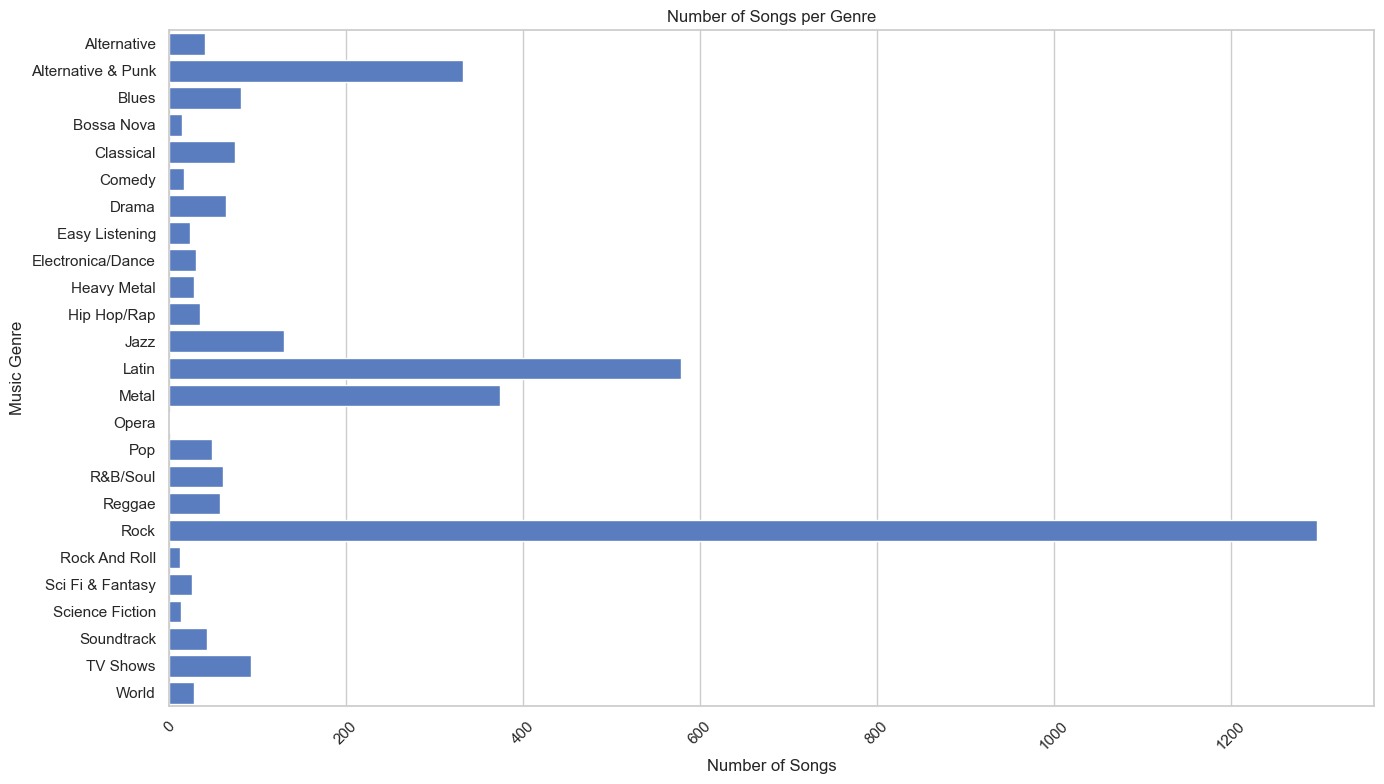

In [27]:
# Visualization
plot_bar(data=genres,
        x="TrackCount",
        y="GenreName",
        title="Number of Songs per Genre",
        xlabel="Number of Songs",
        ylabel="Music Genre",
        output_file="outputs/songs_per_genre.png")

In [28]:
# Query 6: Total sales by country
query_sales = """
SELECT c.Country,
    SUM(i.Total) AS TotalSales
FROM Customer AS c
JOIN Invoice AS i 
    ON c.CustomerId = i.CustomerId
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
sales = run_query(conn, query_sales)
save_to_csv(sales, "sales_by_country.csv")
print(sales.to_string(index=False), "\n")

Data saved to outputs\sales_by_country.csv
       Country  TotalSales
           USA      523.06
        Canada      303.96
        France      195.10
        Brazil      190.10
       Germany      156.48
United Kingdom      112.86
Czech Republic       90.24
      Portugal       77.24
         India       75.26
         Chile       46.62
       Ireland       45.62
       Hungary       45.62
       Austria       42.62
       Finland       41.62
   Netherlands       40.62
        Norway       39.62
        Sweden       38.62
        Poland       37.62
         Italy       37.62
       Denmark       37.62
     Australia       37.62
     Argentina       37.62
         Spain       37.62
       Belgium       37.62 



In [29]:
# Query 7: Artists with most songs
query_artists = """
SELECT ar.Name AS ArtistName,
    COUNT(t.TrackId) AS TrackCount
FROM Artist AS ar
JOIN Album AS al 
    ON ar.ArtistId = al.ArtistId
JOIN Track AS t 
    ON al.AlbumId = t.AlbumId
GROUP BY ar.ArtistId
ORDER BY TrackCount DESC
LIMIT 10;
"""
artists = run_query(conn, query_artists)
save_to_csv(artists, "artists_most_songs.csv")
print(artists.to_string(index=False), "\n")

Data saved to outputs\artists_most_songs.csv
     ArtistName  TrackCount
    Iron Maiden         213
             U2         135
   Led Zeppelin         114
      Metallica         112
           Lost          92
    Deep Purple          92
      Pearl Jam          67
  Lenny Kravitz          57
Various Artists          56
     The Office          53 



In [30]:
# Query 8: Top 5 customers by spending
query_top_customers = """
SELECT c.CustomerId,
    c.FirstName || ' ' || c.LastName AS FullName,
    SUM(i.Total) AS TotalSpent
FROM Customer AS c
JOIN Invoice AS i 
    ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY TotalSpent DESC
LIMIT 5;
"""
top_customers = run_query(conn, query_top_customers)
save_to_csv(top_customers, "top_customers.csv")
print(top_customers.to_string(index=False), "\n")

Data saved to outputs\top_customers.csv
 CustomerId           FullName  TotalSpent
          6        Helena Holý       49.62
         26 Richard Cunningham       47.62
         57         Luis Rojas       46.62
         45    Ladislav Kovács       45.62
         46      Hugh O'Reilly       45.62 



In [31]:
# Query 9: Average song duration by artist (top 10)
query_duration = """
SELECT ar.Name AS ArtistName,
    ROUND(AVG(t.Milliseconds) / 1000, 2) AS AvgDurationSeconds
FROM Artist AS ar
JOIN Album AS al 
    ON ar.ArtistId = al.ArtistId
JOIN Track AS t 
    ON al.AlbumId = t.AlbumId
GROUP BY ar.ArtistId
ORDER BY AvgDurationSeconds DESC
LIMIT 10;
"""
duration = run_query(conn, query_duration)
save_to_csv(duration, "song_duration.csv")
print(duration.to_string(index=False), "\n")

Data saved to outputs\song_duration.csv
                               ArtistName  AvgDurationSeconds
           Battlestar Galactica (Classic)             2925.57
                     Battlestar Galactica             2770.46
                                   Heroes             2599.14
                                     Lost             2589.98
                                  Aquaman             2484.57
                               The Office             1413.74
Leonard Bernstein & New York Philharmonic              596.52
                Scholars Baroque Ensemble              582.03
 Terry Bozzio, Tony Levin & Steve Stevens              575.79
           Adrian Leaper & Doreen de Feis              567.49 

